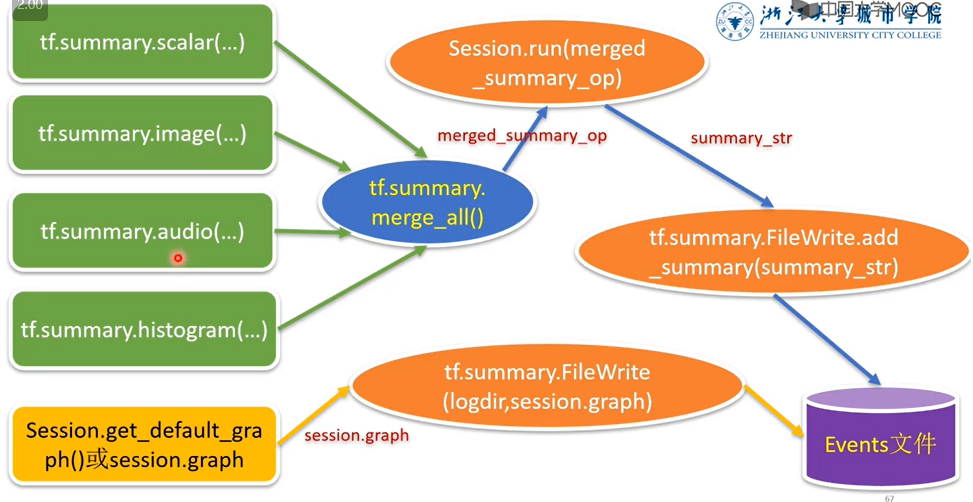

In [6]:
# 载入数据
import tensorflow as tf
# 导入Tensorflow 提供的读取mnist的模块
import tensorflow.examples.tutorials.mnist.input_data as input_data

# 读取mnist数据
mnist = input_data.read_data_sets("E:/FIle/dppdf/data/MNIST_data/",one_hot=True)

Extracting E:/FIle/dppdf/data/MNIST_data/train-images-idx3-ubyte.gz
Extracting E:/FIle/dppdf/data/MNIST_data/train-labels-idx1-ubyte.gz
Extracting E:/FIle/dppdf/data/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting E:/FIle/dppdf/data/MNIST_data/t10k-labels-idx1-ubyte.gz


In [7]:
# 定义全连接层函数
def fcn_layer(inputs,      # 输入数据
             input_dim,     # 输入神经元数量
             output_dim,    # 输出神经元数量
             activation=None):
    W=tf.Variable(tf.truncated_normal([input_dim,output_dim],stddev=0.1))
    b=tf.Variable(tf.zeros([output_dim]))
    XWb = tf.matmul(inputs,W)+b
    if activation is None:
        outputs =XWb
    else:
        outputs=activation(XWb)
    return outputs

In [8]:
x = tf.placeholder(tf.float32,[None,784],name="X")  # 输入样本的特征值的占位符


In [9]:
image_shaped_input = tf.reshape(x,[-1,28,28,1])
tf.summary.image('input',image_shaped_input,10)

<tf.Tensor 'input:0' shape=() dtype=string>

In [10]:
h1 = fcn_layer(inputs=x,
              input_dim=784,
              output_dim=256,
              activation=tf.nn.relu)

In [11]:
forward = fcn_layer(inputs=h1,
                   input_dim=256,
                   output_dim=10,
                   activation=None)
pred = tf.nn.softmax(forward)

In [12]:
tf.summary.histogram('forward',forward)     #  前向输出值在以直方图显示

<tf.Tensor 'forward:0' shape=() dtype=string>

In [13]:
y = tf.placeholder(tf.float32,[None,10],name="Y")   # 标签的占位符

In [14]:
loss_function=tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(logits=forward,labels=y))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [15]:
train_epochs = 40
batch_size = 50
total_batch =int(mnist.train.num_examples/batch_size)
display_step = 1
learning_rate = 0.01

In [16]:
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss_function)

In [17]:
correct_prediction = tf.equal(tf.argmax(y,1),tf.argmax(pred,1))  # 返回真假
accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))  # cast 类型转化，

In [18]:
tf.summary.scalar('accuracy',accuracy)      # 将accuracy准确率以标量显示

<tf.Tensor 'accuracy:0' shape=() dtype=string>

In [19]:
sess= tf.Session()
sess.run(tf.global_variables_initializer())

In [20]:
mergerd_summary_op = tf.summary.merge_all()
writer = tf.summary.FileWriter('E:/log/',sess.graph)# 创建写入符

In [21]:
from time import time
startTime = time()
for epoch in range(train_epochs):
    for batch in range(total_batch):
        xs , ys = mnist.train.next_batch(batch_size) # 读取批次数据
        sess.run(optimizer,feed_dict={x:xs,y:ys}) # 执行批次训练
        summary_str=sess.run(mergerd_summary_op,feed_dict={x:xs,y:ys})
        writer.add_summary(summary_str,epoch)     # 将summary写入文件
    # total_batch 个批次训练完成后，使用验证数据计算误差与准确率
    loss,acc = sess.run([loss_function,accuracy],
                       feed_dict={x:mnist.validation.images,
                                 y:mnist.validation.labels})
    if(epoch+1)% display_step ==0:
        print("Train Epoch:",'%02d'%(epoch+1),
              "Loss=","{:.9f}".format(loss),\
             "Accuracy=","{:.4f}".format(acc))
        # 显示运行总时间
duration = time() - startTime
print("Train Finished takes:","{:.2f}".format(duration))


Train Epoch: 01 Loss= 0.172508761 Accuracy= 0.9538
Train Epoch: 02 Loss= 0.153316155 Accuracy= 0.9612
Train Epoch: 03 Loss= 0.132028714 Accuracy= 0.9670
Train Epoch: 04 Loss= 0.148124397 Accuracy= 0.9674
Train Epoch: 05 Loss= 0.157857537 Accuracy= 0.9666
Train Epoch: 06 Loss= 0.171717525 Accuracy= 0.9648
Train Epoch: 07 Loss= 0.167876199 Accuracy= 0.9700
Train Epoch: 08 Loss= 0.209097371 Accuracy= 0.9650
Train Epoch: 09 Loss= 0.210903049 Accuracy= 0.9662
Train Epoch: 10 Loss= 0.224343851 Accuracy= 0.9626
Train Epoch: 11 Loss= 0.220284417 Accuracy= 0.9692
Train Epoch: 12 Loss= 0.238043845 Accuracy= 0.9712
Train Epoch: 13 Loss= 0.297865629 Accuracy= 0.9672
Train Epoch: 14 Loss= 0.266689062 Accuracy= 0.9710
Train Epoch: 15 Loss= 0.274706066 Accuracy= 0.9710
Train Epoch: 16 Loss= 0.275344372 Accuracy= 0.9688
Train Epoch: 17 Loss= 0.246707648 Accuracy= 0.9714
Train Epoch: 18 Loss= 0.257697314 Accuracy= 0.9738
Train Epoch: 19 Loss= 0.283975929 Accuracy= 0.9718
Train Epoch: 20 Loss= 0.3039960

In [21]:
accu_test = sess.run(accuracy,
                    feed_dict={x:mnist.test.images,y:mnist.test.labels})
print("Test Accuracy:",accu_test)

Test Accuracy: 0.9713
